In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
def sigmoid(z):
    return np.tanh(z)

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
x = mnist.data
y = mnist.target

# (o dataset já vem embaralhado)

# The pixel intensities are scaled to lie between 0 and 1 
x = x / 255.0

x_train = x[:60000]
y_train = y[:60000]

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = x[60000:]
y_test = y[60000:]

x_test = np.array(x_test)
y_test = np.array(y_test)

# add extra column of 1's to x_train and x_test (at the beginning)
x_train = np.insert(x_train, 0, 1, axis=1)
x_test = np.insert(x_test, 0, 1, axis=1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 785) (60000,) (10000, 785) (10000,)


In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [7]:
# get all possbile labels
#labels = ['0', '1', '2', '3']
labels = np.unique(y_train)
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
w = np.zeros((786, len(labels)))
w.shape

(786, 10)

In [9]:
for l in labels:
    w[:, int(l)] = np.load(f'weights/{l}.npy')

In [10]:
yw = np.zeros((len(y_test), len(labels)))
yw.shape

(10000, 10)

In [11]:
for l in labels:
    beta = w[:-1, int(l)]
    v = w[-1, int(l)]
    y_hat = sigmoid(X_test @ beta + v)
    yw[:, int(l)] = y_hat

In [12]:
y_hat = np.argmax(yw, axis=1)

In [13]:
accuracy = np.mean(y_hat == y_test.astype(int))

print(f'Precisão de {accuracy*100:.2f}%')

Precisão de 90.56%


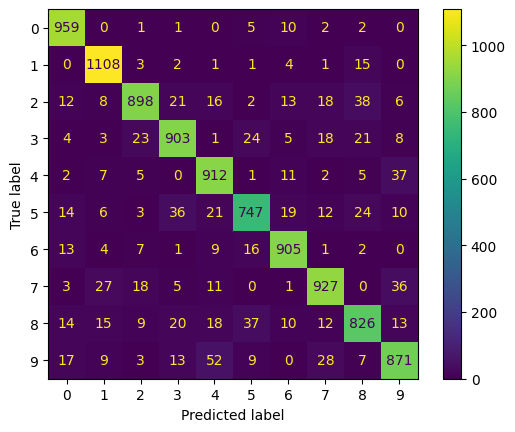

In [14]:
cm = confusion_matrix(y_test.astype(int), y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()